In [1]:
# Import the dependencies
import pandas as pd
import numpy as np
import matplotlib as plt
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime
import time

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90,90,1500)
lngs = np.random.uniform(-180,180,1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
coordinates = list(lat_lngs)
# Create a list for holding the cities.
cities = []
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
     # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
print(len(cities))

631


In [4]:
import requests
requests.__version__


'2.26.0'

In [5]:
city_data_df = pd.DataFrame()

In [6]:
city_data_df['City'] = ''
city_data_df['Country'] = ''
city_data_df['Date'] = ''
city_data_df['Lat'] = ''
city_data_df['Lng'] = ''
city_data_df['Max Temp'] = ''
city_data_df['Humidity'] = ''
city_data_df['Cloudiness'] = ''
city_data_df['Wind Speed'] = ''


In [7]:
city_data_df


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed


In [8]:
city_data_df['City'] = cities

In [9]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,hilo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,rikitea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,honiara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,bredasdorp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,jamestown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
626,nantucket,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
627,ketchikan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
628,polunochnoye,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
629,krasnaya gora,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
set_count = 1
record_count = 1
city_data = []

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | hilo
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | honiara
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | aflu
City not found. Skipping...
Processing Record 7 of Set 1 | obera
Processing Record 8 of Set 1 | shingu
Processing Record 9 of Set 1 | lorengau
Processing Record 10 of Set 1 | pedro ii
Processing Record 11 of Set 1 | tir pol
City not found. Skipping...
Processing Record 12 of Set 1 | komsomolskiy
Processing Record 13 of Set 1 | te anau
Processing Record 14 of Set 1 | sarangani
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | aksha
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | morro bay
Processing Record 19 of Set 1 | east london
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | mahajanga
Processing Record 22 of Set 1 | umm kaddadah
Processing Record 23 of Set 1 | barrow
Processing Record 2

Processing Record 41 of Set 4 | sioux falls
Processing Record 42 of Set 4 | lata
Processing Record 43 of Set 4 | ankazoabo
Processing Record 44 of Set 4 | luderitz
Processing Record 45 of Set 4 | burtunay
Processing Record 46 of Set 4 | caravelas
Processing Record 47 of Set 4 | puerto ayora
Processing Record 48 of Set 4 | puerto escondido
Processing Record 49 of Set 4 | dingle
Processing Record 50 of Set 4 | constitucion
Processing Record 1 of Set 5 | la ronge
Processing Record 2 of Set 5 | geraldton
Processing Record 3 of Set 5 | bambous virieux
Processing Record 4 of Set 5 | aykhal
Processing Record 5 of Set 5 | killybegs
Processing Record 6 of Set 5 | mergui
City not found. Skipping...
Processing Record 7 of Set 5 | emerald
Processing Record 8 of Set 5 | badou
Processing Record 9 of Set 5 | yeniseysk
Processing Record 10 of Set 5 | novoagansk
Processing Record 11 of Set 5 | ormara
Processing Record 12 of Set 5 | tarauaca
Processing Record 13 of Set 5 | mombaca
Processing Record 14 o

Processing Record 27 of Set 8 | aktau
Processing Record 28 of Set 8 | ilulissat
Processing Record 29 of Set 8 | vila franca do campo
Processing Record 30 of Set 8 | guerrero negro
Processing Record 31 of Set 8 | soure
Processing Record 32 of Set 8 | abu kamal
Processing Record 33 of Set 8 | amiens
Processing Record 34 of Set 8 | broome
Processing Record 35 of Set 8 | anadyr
Processing Record 36 of Set 8 | valdez
Processing Record 37 of Set 8 | sesheke
Processing Record 38 of Set 8 | lewistown
Processing Record 39 of Set 8 | quata
Processing Record 40 of Set 8 | sri aman
Processing Record 41 of Set 8 | nanded
City not found. Skipping...
Processing Record 42 of Set 8 | ponta delgada
Processing Record 43 of Set 8 | nuuk
Processing Record 44 of Set 8 | salta
Processing Record 45 of Set 8 | pangnirtung
Processing Record 46 of Set 8 | cidreira
Processing Record 47 of Set 8 | ayan
Processing Record 48 of Set 8 | limbang
Processing Record 49 of Set 8 | mocambique
City not found. Skipping...
Pr

Processing Record 19 of Set 12 | rungata
City not found. Skipping...
Processing Record 20 of Set 12 | sabha
Processing Record 21 of Set 12 | zaltan
Processing Record 22 of Set 12 | kenai
Processing Record 23 of Set 12 | grand river south east
City not found. Skipping...
Processing Record 24 of Set 12 | jinji
Processing Record 25 of Set 12 | rybinsk
Processing Record 26 of Set 12 | todos santos
Processing Record 27 of Set 12 | nam tha
City not found. Skipping...
Processing Record 28 of Set 12 | noumea
Processing Record 29 of Set 12 | miraflores
Processing Record 30 of Set 12 | yarmouth
Processing Record 31 of Set 12 | matanzas
Processing Record 32 of Set 12 | autazes
Processing Record 33 of Set 12 | balkhash
Processing Record 34 of Set 12 | maragogi
Processing Record 35 of Set 12 | tawkar
City not found. Skipping...
Processing Record 36 of Set 12 | leiyang
Processing Record 37 of Set 12 | salo
Processing Record 38 of Set 12 | glubokoe
City not found. Skipping...
Processing Record 39 of 

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hilo,19.7297,-155.0900,81.28,76,40,6.91,US,2022-04-23 01:06:25
1,Rikitea,-23.1203,-134.9692,72.28,87,100,7.76,PF,2022-04-23 01:03:56
2,Honiara,-9.4333,159.9500,83.70,79,93,4.99,SB,2022-04-23 01:06:26
3,Bredasdorp,-34.5322,20.0403,54.59,66,0,5.28,ZA,2022-04-23 01:06:27
4,Jamestown,42.0970,-79.2353,51.53,58,0,6.91,US,2022-04-23 01:06:14
5,Obera,-27.4871,-55.1199,64.71,100,100,1.99,AR,2022-04-23 01:06:28
6,Shingu,33.7333,135.9833,75.06,48,100,4.70,JP,2022-04-23 01:06:28
7,Lorengau,-2.0226,147.2712,84.04,75,88,6.69,PG,2022-04-23 01:04:31
8,Pedro Ii,-4.4247,-41.4586,68.25,93,95,3.27,BR,2022-04-23 01:06:29
9,Komsomolskiy,40.4272,71.7189,54.32,66,0,6.91,UZ,2022-04-23 01:04:30


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

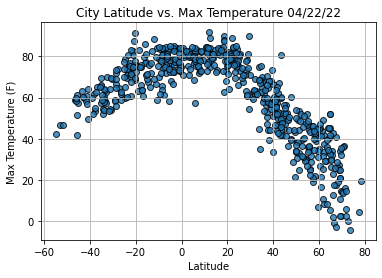

In [14]:
import matplotlib.pyplot as plt
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

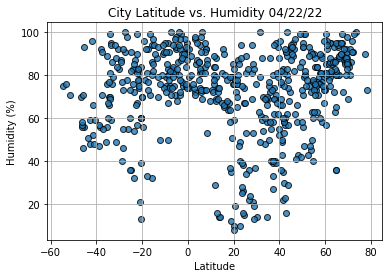

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

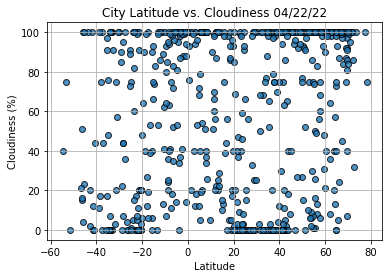

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

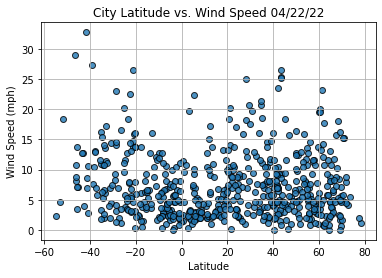

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

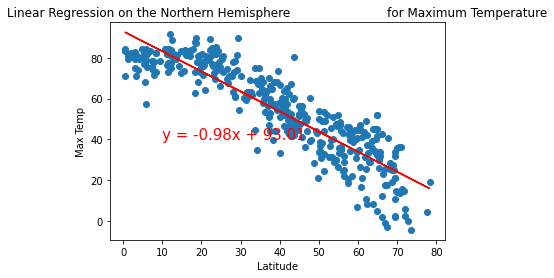

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

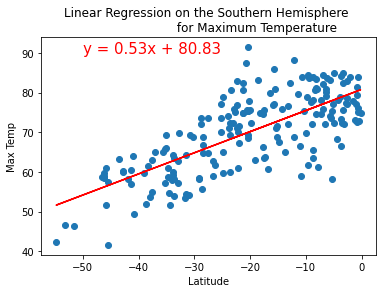

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n \
                        for Maximum Temperature', 'Max Temp',(-50,90))

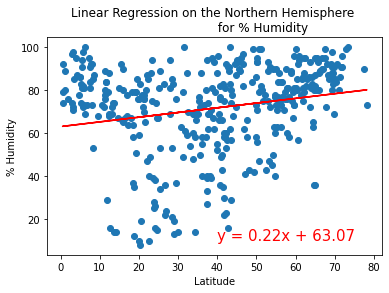

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n \
                        for % Humidity', '% Humidity',(40,10))

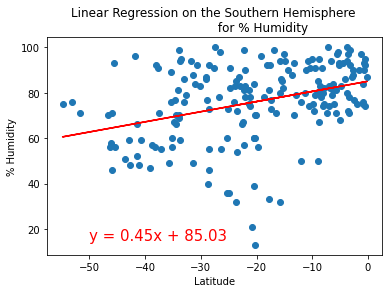

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n \
                        for % Humidity', '% Humidity',(-50,15))

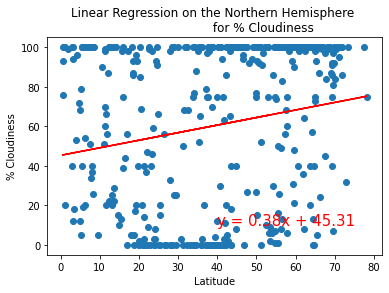

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n \
                        for % Cloudiness', '% Cloudiness',(40,10))

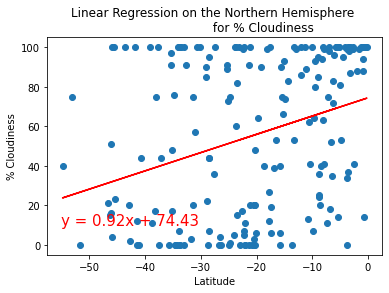

In [31]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n \
                        for % Cloudiness', '% Cloudiness',(-55,10))

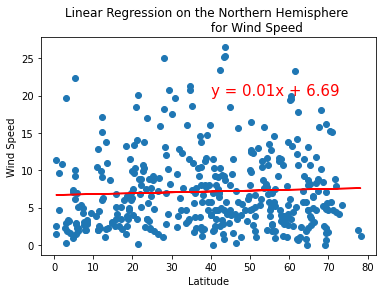

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n \
                        for Wind Speed', 'Wind Speed',(40,20))

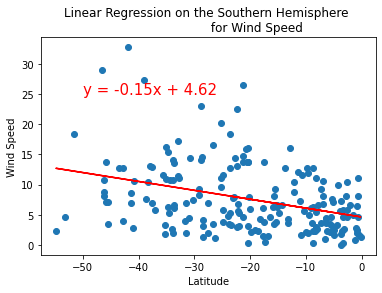

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n \
                        for Wind Speed', 'Wind Speed',(-50,25))